In [76]:
import pandas as pd
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [129]:
liver_df=pd.read_csv("indian_liver_patient.csv")
liver_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [78]:
liver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [79]:
liver_df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [80]:
liver_df.describe(include="all")

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000


In [81]:
liver_df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

Number of patients diagnosed with liver disease:  416
Number of patients not diagnosed with liver disease:  167


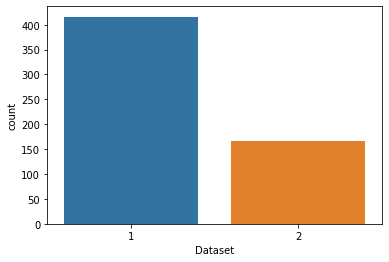

In [82]:
sns.countplot(data=liver_df, x = 'Dataset', label='Count')

LD,NLD = liver_df['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

Number of patients that are male:  441
Number of patients that are female:  142


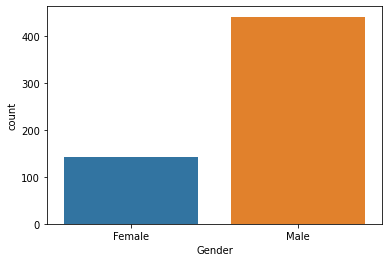

In [83]:
sns.countplot(data=liver_df, x = 'Gender', label='Count')

M, F = liver_df['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


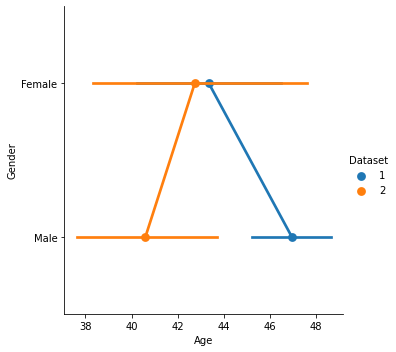

In [84]:
sns.factorplot(x="Age", y="Gender", hue="Dataset", data=liver_df);

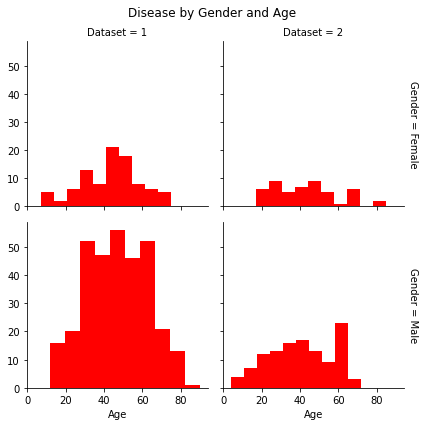

In [85]:
g = sns.FacetGrid(liver_df, col="Dataset", row="Gender", margin_titles=True)
g.map(plt.hist, "Age", color="red")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age');

Age seems to be a factor for liver disease for both male and female genders

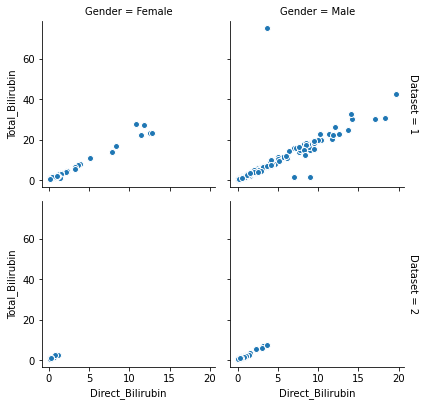

In [86]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Direct_Bilirubin", "Total_Bilirubin", edgecolor="w")
plt.subplots_adjust(top=0.9)

both total bilrubin and direct bilurubin are linear realationship. so we can use anyone feature 

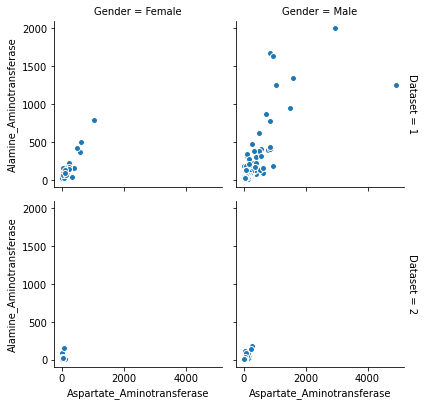

In [87]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Aspartate_Aminotransferase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

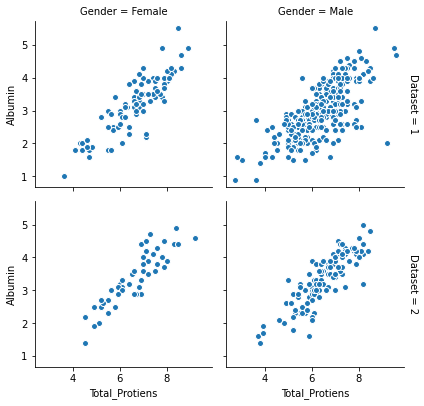

In [88]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Total_Protiens", "Albumin",  edgecolor="w")
plt.subplots_adjust(top=0.9)

linear relationship between protiens and albumins

similarly we found both Aspartate_Aminotransferase and Alamine_Aminotransferase are linearly related

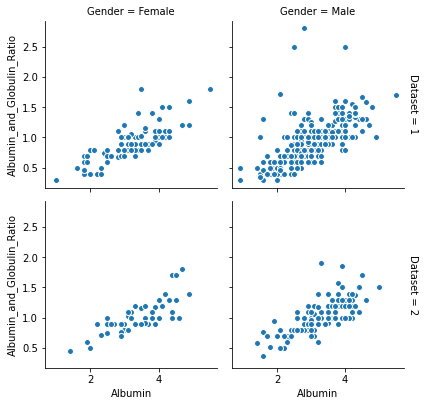

In [89]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin", "Albumin_and_Globulin_Ratio",  edgecolor="w")
plt.subplots_adjust(top=0.9)

linear relation between albumin and albumin and globin ratio

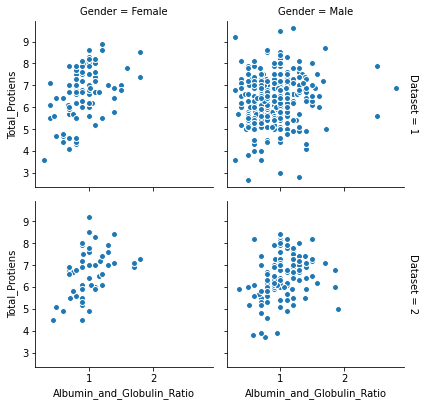

In [90]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin_and_Globulin_Ratio", "Total_Protiens",  edgecolor="w")
plt.subplots_adjust(top=0.9)

we can't find a relation between albumin and globin ratio and total protein

In [91]:
liver_df=pd.get_dummies(liver_df,drop_first=True)
liver_df.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,1


In [92]:
liver_df["Albumin_and_Globulin_Ratio"] = liver_df.Albumin_and_Globulin_Ratio.fillna(liver_df['Albumin_and_Globulin_Ratio'].mean())


In [93]:
import seaborn as sns

In [94]:
X = liver_df.drop(['Gender_Male','Dataset'], axis=1)
X.head(3)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89


In [95]:
y=liver_df['Dataset']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Dataset, dtype: int64

In [96]:
X.corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322
Albumin_and_Globulin_Ratio,-0.216089,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000


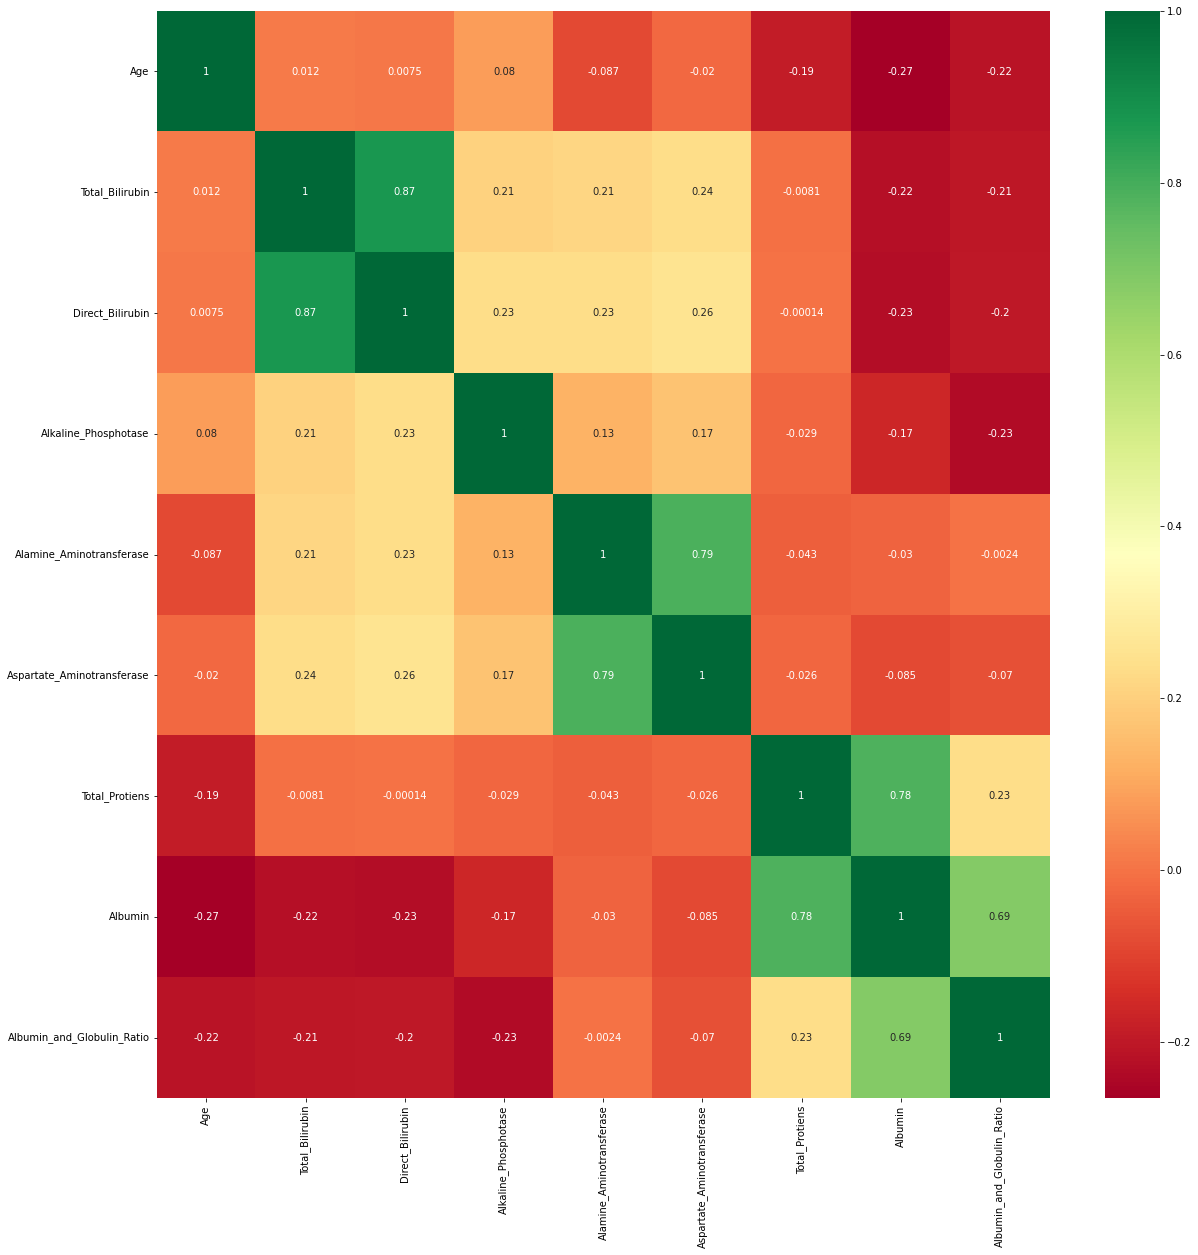

In [97]:
cormat=X.corr()
top_corr_features=cormat.index
plt.figure(figsize=(20,20))

# color indicators for correlation
#dark green says highly correlated whereas red says negatively correlated
#for each features
g=sns.heatmap(liver_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

we can observe all linear related features as discussed above

In [98]:
# Importing modules
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(408, 9)
(408,)
(175, 9)
(175,)


In [100]:
np.any(np.isnan(liver_df))


False

In [101]:
np.all(np.isfinite(liver_df))

True

Logistic Regression Training Score:  72.06
Logistic Regression Test Score:  70.29
Coefficient: 
 [[-0.00847996 -0.16017582 -0.28408741 -0.00070413 -0.00974346 -0.00273716
  -0.20233463  0.39752823  0.51276728]]
Intercept:  [0.27481831]
Accuracy:  0.7028571428571428
Confusion Matrix: 
 [[111  13]
 [ 39  12]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.74      0.90      0.81       124
           2       0.48      0.24      0.32        51

    accuracy                           0.70       175
   macro avg       0.61      0.57      0.56       175
weighted avg       0.66      0.70      0.67       175



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


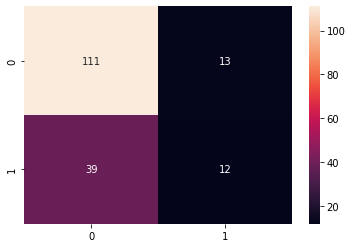

In [103]:
#2) Logistic Regression
# Create logistic regression object
logreg = LogisticRegression()
# Train the model using the training sets and check score
logreg.fit(X_train, y_train)
#Predict Output
log_predicted= logreg.predict(X_test)

logreg_score = round(logreg.score(X_train, y_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Logistic Regression Training Score: ', logreg_score)
print('Logistic Regression Test Score: ', logreg_score_test)
print('Coefficient: \n', logreg.coef_)
print('Intercept: ', logreg.intercept_)
print('Accuracy: ', accuracy_score(y_test,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,log_predicted))
print('Classification Report: \n', classification_report(y_test,log_predicted))

sns.heatmap(confusion_matrix(y_test,log_predicted),annot=True,fmt="d")

In [104]:
coeff_df = pd.DataFrame(X.columns)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
8,Albumin_and_Globulin_Ratio,0.512767
7,Albumin,0.397528
3,Alkaline_Phosphotase,-0.000704
5,Aspartate_Aminotransferase,-0.002737
0,Age,-0.008480
4,Alamine_Aminotransferase,-0.009743
1,Total_Bilirubin,-0.160176
6,Total_Protiens,-0.202335
2,Direct_Bilirubin,-0.284087


Gaussian Score: 
 55.88
Gaussian Test Score: 
 53.14
Accuracy: 
 0.5314285714285715
[[44 80]
 [ 2 49]]
              precision    recall  f1-score   support

           1       0.96      0.35      0.52       124
           2       0.38      0.96      0.54        51

    accuracy                           0.53       175
   macro avg       0.67      0.66      0.53       175
weighted avg       0.79      0.53      0.53       175



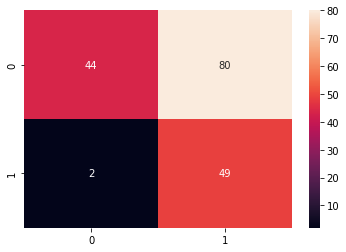

In [105]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
#Predict Output
gauss_predicted = gaussian.predict(X_test)

gauss_score = round(gaussian.score(X_train, y_train) * 100, 2)
gauss_score_test = round(gaussian.score(X_test, y_test) * 100, 2)
print('Gaussian Score: \n', gauss_score)
print('Gaussian Test Score: \n', gauss_score_test)
print('Accuracy: \n', accuracy_score(y_test, gauss_predicted))
print(confusion_matrix(y_test,gauss_predicted))
print(classification_report(y_test,gauss_predicted))

sns.heatmap(confusion_matrix(y_test,gauss_predicted),annot=True,fmt="d")

In [106]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
#Predict Output
rf_predicted = random_forest.predict(X_test)

random_forest_score = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_score_test = round(random_forest.score(X_test, y_test) * 100, 2)
print('Random Forest Score: \n', random_forest_score)
print('Random Forest Test Score: \n', random_forest_score_test)
print('Accuracy: \n', accuracy_score(y_test,rf_predicted))
print(confusion_matrix(y_test,rf_predicted))
print(classification_report(y_test,rf_predicted))

Random Forest Score: 
 100.0
Random Forest Test Score: 
 69.71
Accuracy: 
 0.6971428571428572
[[103  21]
 [ 32  19]]
              precision    recall  f1-score   support

           1       0.76      0.83      0.80       124
           2       0.47      0.37      0.42        51

    accuracy                           0.70       175
   macro avg       0.62      0.60      0.61       175
weighted avg       0.68      0.70      0.69       175



In [107]:
#We can now rank our evaluation of all the models to choose the best one for our problem. 
models = pd.DataFrame({
    'Model': [ 'Logistic Regression', 'Gaussian Naive Bayes','Random Forest'],
    'Score': [ logreg_score, gauss_score, random_forest_score],
    'Test Score': [ logreg_score_test, gauss_score_test, random_forest_score_test]})
models.sort_values(by='Test Score', ascending=False)

,Model,Score,Test Score
0,Logistic Regression,72.06,70.29
2,Random Forest,100.00,69.71
1,Gaussian Naive Bayes,55.88,53.14


In [113]:
linear = linear_model.LinearRegression()
# Train the model using the training sets and check score
linear.fit(X_train, y_train)
#Predict Output
lin_predicted = linear.predict(X_test)

linear_score = round(linear.score(X_train, y_train) * 100, 2)
linear_score_test = round(linear.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Linear Regression Score: \n', linear_score)
print('Linear Regression Test Score: \n', linear_score_test)
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

from sklearn.feature_selection import RFE
rfe =RFE(linear, n_features_to_select=4)
rfe.fit(X,y)

Linear Regression Score: 
 8.68
Linear Regression Test Score: 
 6.27
Coefficient: 
 [-0.02973656 -0.06982836  0.13587026]
Intercept: 
 1.3609287245752073


RFE(estimator=LinearRegression(), n_features_to_select=4)

In [114]:
for i in range(len(rfe.ranking_)):
    if rfe.ranking_[i] == 1:
        print(X.columns.values[i])

Direct_Bilirubin
Total_Protiens
Albumin
Albumin_and_Globulin_Ratio


In [118]:
finX = liver_df[['Total_Protiens','Albumin','Gender_Male']]
finX.head(4)

,Total_Protiens,Albumin,Gender_Male
0,6.8,3.3,0
1,7.5,3.2,1
2,7.0,3.3,1
3,6.8,3.4,1


In [116]:
X_train, X_test, y_train, y_test = train_test_split(finX, y, test_size=0.30, random_state=101)

Logistic Regression Training Score: 
 71.57
Logistic Regression Test Score: 
 69.71
Coefficient: 
 [[-0.88786352 -0.38700117  0.6195841 ]]
Intercept: 
 [0.27102863]
Accuracy: 
 0.6971428571428572
Confusion Matrix: 
 [[118   6]
 [ 47   4]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.72      0.95      0.82       124
           2       0.40      0.08      0.13        51

    accuracy                           0.70       175
   macro avg       0.56      0.52      0.47       175
weighted avg       0.62      0.70      0.62       175



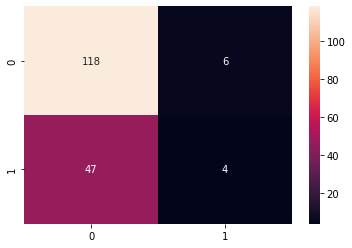

In [117]:
#Logistic Regression
logreg = LogisticRegression()
# Train the model using the training sets and check score
logreg.fit(X_train, y_train)
#Predict Output
log_predicted= logreg.predict(X_test)

logreg_score = round(logreg.score(X_train, y_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)
print('Coefficient: \n', logreg.coef_)
print('Intercept: \n', logreg.intercept_)
print('Accuracy: \n', accuracy_score(y_test,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,log_predicted))
print('Classification Report: \n', classification_report(y_test,log_predicted))

sns.heatmap(confusion_matrix(y_test,log_predicted),annot=True,fmt="d")

Logistic Regression Training Score: 
 71.08
Logistic Regression Test Score: 
 71.43
Coefficient: 
 [[-0.58254377  1.08940697 -0.54185122]]
Intercept: 
 [-0.20423275]
Accuracy: 
 0.7142857142857143
Confusion Matrix: 
 [[120   4]
 [ 46   5]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.72      0.97      0.83       124
           2       0.56      0.10      0.17        51

    accuracy                           0.71       175
   macro avg       0.64      0.53      0.50       175
weighted avg       0.67      0.71      0.63       175



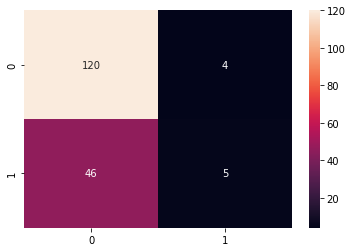

In [120]:
#Logistic Regression
logreg = LogisticRegression()
# Train the model using the training sets and check score
logreg.fit(X_train, y_train)
#Predict Output
log_predicted= logreg.predict(X_test)

logreg_score = round(logreg.score(X_train, y_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)
print('Coefficient: \n', logreg.coef_)
print('Intercept: \n', logreg.intercept_)
print('Accuracy: \n', accuracy_score(y_test,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,log_predicted))
print('Classification Report: \n', classification_report(y_test,log_predicted))

sns.heatmap(confusion_matrix(y_test,log_predicted),annot=True,fmt="d")

In [124]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.layers.convolutional import Convolution2D

In [130]:
df=pd.read_csv("indian_liver_patient.csv")

In [135]:
df["Albumin_and_Globulin_Ratio"].fillna("0.6", inplace = True) 

In [172]:
df_sex = pd.get_dummies(df['Gender'])
df_new = pd.concat([df, df_sex], axis=1)
Droop_gender = df_new.drop(labels=['Gender' ],axis=1 )
Droop_gender.columns = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio','Male','Fmale','Dataset']
#print(Droop_gender.shape)
X = Droop_gender.drop('Dataset',axis=1)
print(X.shape)
print(y.shape)
y = Droop_gender['Dataset']

(583, 11)
(583,)


In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [138]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [139]:
classifier = Sequential() # Initialising the ANN

classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# compile ANN
classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the data
hisroy =classifier.fit(X_train, y_train, batch_size = 20, epochs = 50)

Epoch 1/50
24/24 [==============================] - 1s 2ms/step - loss: 0.6874 - accuracy: 0.7446
Epoch 2/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6757 - accuracy: 0.7446
Epoch 3/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6562 - accuracy: 0.7446
Epoch 4/50
24/24 [==============================] - 0s 2ms/step - loss: 0.6237 - accuracy: 0.7446
Epoch 5/50
24/24 [==============================] - 0s 2ms/step - loss: 0.5747 - accuracy: 0.7446
Epoch 6/50
24/24 [==============================] - 0s 2ms/step - loss: 0.5124 - accuracy: 0.7446
Epoch 7/50
24/24 [==============================] - 0s 2ms/step - loss: 0.4406 - accuracy: 0.7446
Epoch 8/50
24/24 [==============================] - 0s 2ms/step - loss: 0.3658 - accuracy: 0.7446
Epoch 9/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2992 - accuracy: 0.7468
Epoch 10/50
24/24 [==============================] - 0s 3ms/step - loss: 0.2443 - accuracy: 0.9850
Epoch 11/50
24/24 [

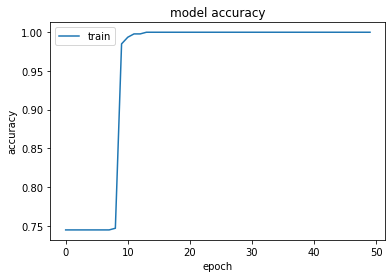

In [141]:
plt.plot(hisroy.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

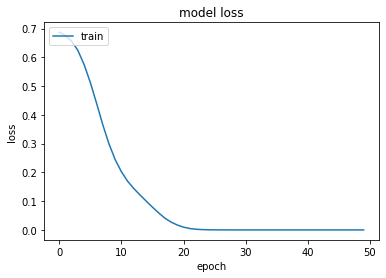

In [142]:
plt.plot(hisroy.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

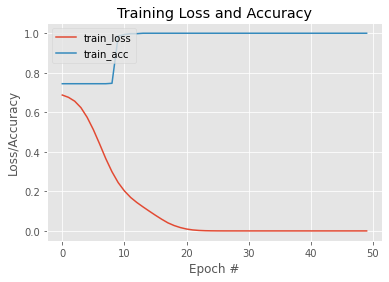

In [143]:
plt.style.use("ggplot")
plt.figure()
N = 50
plt.plot(np.arange(0, N), hisroy.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), hisroy.history["accuracy"], label="train_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")

In [144]:
y_pred = classifier.predict(X_test)
y_pred = [ 1 if y>=0.5 else 0 for y in y_pred ]

In [145]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        94

    accuracy                           1.00       117
   macro avg       1.00      1.00      1.00       117
weighted avg       1.00      1.00      1.00       117



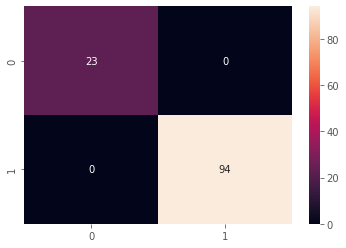

In [151]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d")

In [159]:
TP=94
TN=23
FP=0
FN=0

In [164]:
metric="ACC"
metric=(TP+TN) / (TP+TN+FP+FN) *100
print(f" ACCURACY is {metric: .3f}")

 ACCURACY is  100.000
